**Introduction**

- Polynomial approximation and interpolation are essential for data fitting and function estimation.
- Least squares fitting extends to higher-degree polynomials.
 $$
 y(t) ={ \alpha_0 + \alpha_1 t }+ \dots + \alpha_n t^n.
 $$
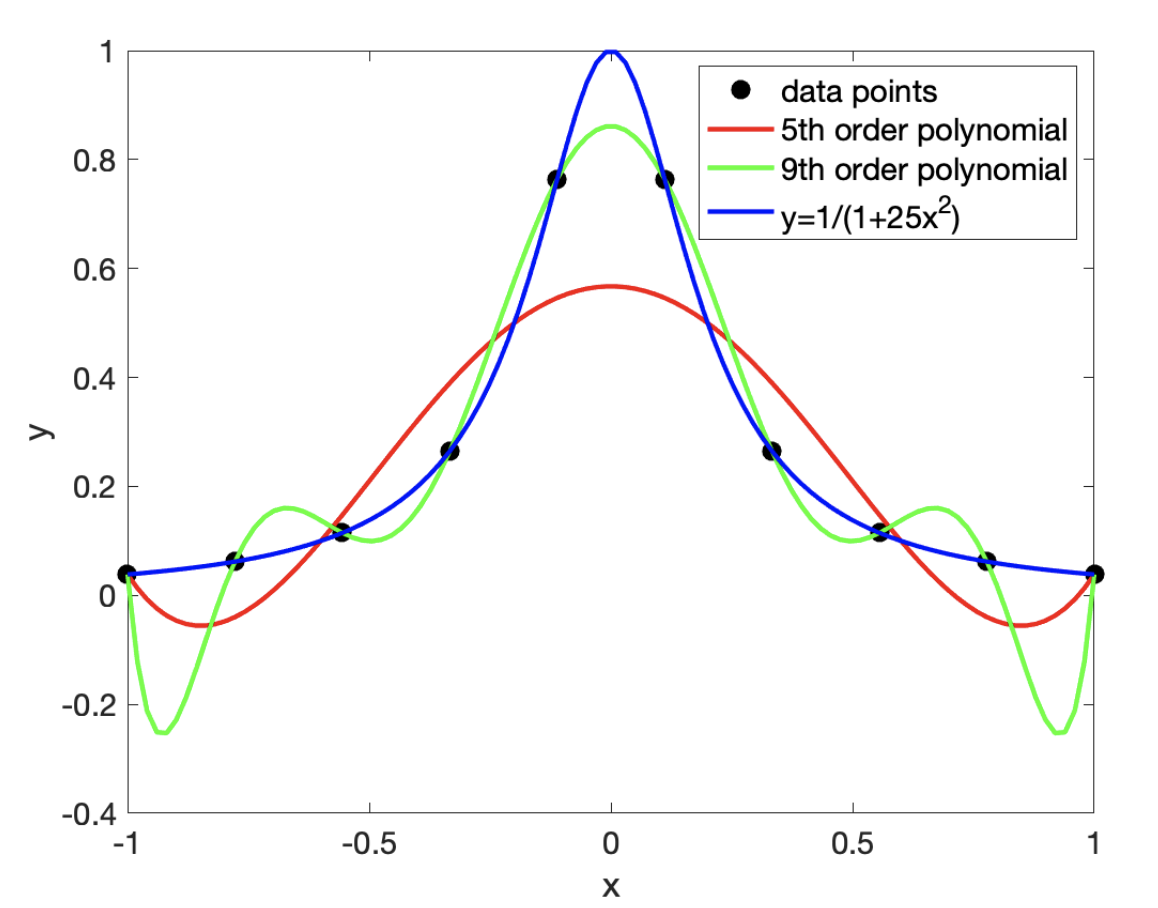

**Least Squares Approximation**

- We fit a polynomial of degree $n$: 

$y(t) = \alpha_0 + \alpha_1 t + \dots + \alpha_n t^n$.

- The total squared error is minimized:

$\|e\|^2 = \sum_{i=1}^{m} (y_i - y(t_i))^2$

- Matrix formulation:
$$
 A \mathbf{x} = \mathbf{y}, \quad A = \begin{bmatrix} {1} & {t_1} & t_1^2 & \dots & t_1^n \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ {1} & {t_m} & t_m^2 & \dots & t_m^n \end{bmatrix}
$$

**Vandermonde Matrices and Interpolation**

- If $m = n+1$, the Vandermonde matrix is square.
- The system $Ax = y$ is solvable if $A$ is nonsingular.
- Theorem: If $t_1, \dots, t_{n+1}$ are distinct, then $A$ is invertible.


If $t_1, \dots, t_{n+1} \in \mathbb{R}$ are distinct, meaning $t_i \neq t_j$ for $i \neq j$, then the $(n+1) \times (n+1)$ Vandermonde interpolation matrix is nonsingular.
 
No repeated data point
    
This result implies the basic existence theorem for interpolating polynomials.
\end{frame}

**Existence of Interpolating Polynomial**
Theorem: Let $t_1, \dots, t_{n+1}$ be distinct sample points. Then, for any prescribed data $y_1, \dots, y_{n+1}$, there exists a unique interpolating polynomial $y(t)$ of degree $\leq n$ that satisfies the conditions:
    \begin{equation*}
        y(t_i) = y_i, \quad \forall i = 1, \dots, n+1.
    \end{equation*}
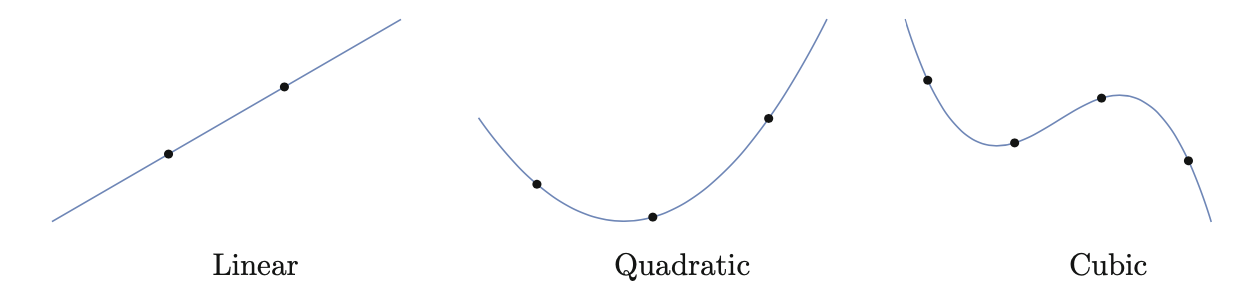
- {2 points} will determine a unique interpolating line
- {3 points} a unique interpolating parabola
- {4 points} an interpolating cubic, and so on

**Approximating $e^t$ with Interpolation**
To approximate $e^t$ for $0 \leq t \leq 1$, we use a quadratic polynomial interpolation.
    
Choosing three points: $t_1 = 0$, $t_2 = 0.5$, and $t_3 = 1$, we seek a unique quadratic polynomial $p(t)$ satisfying:

   \begin{equation*}
        p(t_i) = e^{t_i}, \quad i = 1,2,3.
    \end{equation*}


**Quadratic Interpolating Polynomial**

We assume $p(t)$ has the form:
    \begin{equation*}
        p(t) = \alpha + \beta t + \gamma t^2.
    \end{equation*}
Using the interpolation conditions, we set up the system:
    \begin{equation*}
        \begin{bmatrix} 1 & 0 & 0 \\ 1 & 0.5 & 0.25 \\ 1 & 1 & 1 \end{bmatrix}
        \begin{bmatrix} \alpha \\ \beta \\ \gamma \end{bmatrix} = 
        \begin{bmatrix} 1 \\ 1.64872 \\ 2.71828 \end{bmatrix}.
    \end{equation*}

**Solving for Coefficients**
The system $Ax = y$ has a unique solution since $A$ is nonsingular:

  \begin{equation*}
        \begin{bmatrix} \alpha \\ \beta \\ \gamma \end{bmatrix} =
        \begin{bmatrix} 1 \\ 0.876603 \\ 0.841679 \end{bmatrix}.
    \end{equation*}

Thus, the interpolating polynomial is:
    \begin{equation*}
        p(t) = 1 + 0.876603 t + 0.841679 t^2.
    \end{equation*}


Interpolating polynomial coefficients:
α = 1.000000, β = 0.876603, γ = 0.841679


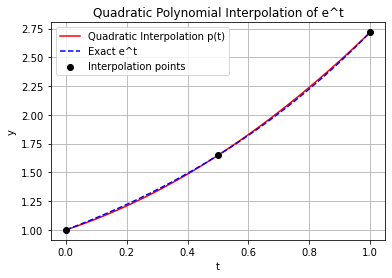

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Step 1: Define the interpolation points and function values
# ---------------------------------------------------------
t_points = np.array([0, 0.5, 1])                 # t1, t2, t3
y_points = np.exp(t_points)                      # y = e^t

# ---------------------------------------------------------
# Step 2: Build the Vandermonde matrix for quadratic polynomial
# Polynomial form: p(t) = α + β t + γ t^2
# ---------------------------------------------------------
A = np.vander(t_points, N=3, increasing=True)   # 3 columns: t^0, t^1, t^2

# ---------------------------------------------------------
# Step 3: Solve the linear system Ax = y to get coefficients
# ---------------------------------------------------------
coefficients = np.linalg.solve(A, y_points)     # x = [α, β, γ]
alpha, beta, gamma = coefficients

print("Interpolating polynomial coefficients:")
print(f"α = {alpha:.6f}, β = {beta:.6f}, γ = {gamma:.6f}")

# ---------------------------------------------------------
# Step 4: Evaluate polynomial at fine points for plotting
# ---------------------------------------------------------
t_fine = np.linspace(0, 1, 100)
y_poly = alpha + beta * t_fine + gamma * t_fine**2
y_exact = np.exp(t_fine)                        # exact e^t

# ---------------------------------------------------------
# Step 5: Plot interpolation
# ---------------------------------------------------------
plt.plot(t_fine, y_poly, 'r-', label='Quadratic Interpolation p(t)')
plt.plot(t_fine, y_exact, 'b--', label='Exact e^t')
plt.scatter(t_points, y_points, color='black', zorder=5, label='Interpolation points')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Quadratic Polynomial Interpolation of e^t')
plt.legend()
plt.grid(True)
plt.show()


Polynomial coefficients (α0, α1, ..., αn):
[1.         0.87660325 0.84167857]


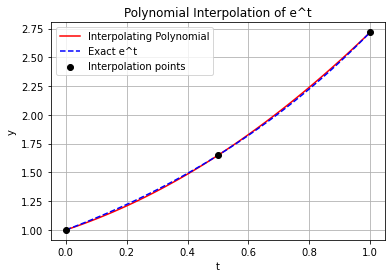

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def polynomial_interpolation(t_points, y_points, t_eval=None):
    """
    Interpolate a polynomial of degree n at given points.
    
    Parameters:
        t_points : array-like
            The interpolation points (x-values).
        y_points : array-like
            Function values at the interpolation points (y-values).
        t_eval : array-like, optional
            Points where the interpolating polynomial should be evaluated.
            If None, t_points will be used.
    
    Returns:
        coefficients : array
            Polynomial coefficients [α0, α1, ..., αn].
        y_eval : array
            Polynomial evaluated at t_eval points.
    """
    t_points = np.array(t_points)
    y_points = np.array(y_points)
    
    degree = len(t_points) - 1  # maximum degree of interpolating polynomial
    A = np.vander(t_points, N=degree+1, increasing=True)  # Vandermonde matrix
    
    # Solve for coefficients
    coefficients = np.linalg.solve(A, y_points)
    
    # Evaluate polynomial
    if t_eval is None:
        t_eval = t_points
    t_eval = np.array(t_eval)
    y_eval = sum(coeff * t_eval**i for i, coeff in enumerate(coefficients))
    
    return coefficients, y_eval

# ---------------------------------------------------------
# Example usage: Interpolating e^t at three points
# ---------------------------------------------------------
t_points = [0, 0.5, 1]
y_points = np.exp(t_points)
t_fine = np.linspace(0, 1, 100)

coeffs, y_poly = polynomial_interpolation(t_points, y_points, t_eval=t_fine)

print("Polynomial coefficients (α0, α1, ..., αn):")
print(coeffs)

# Plot
plt.plot(t_fine, y_poly, 'r-', label='Interpolating Polynomial')
plt.plot(t_fine, np.exp(t_fine), 'b--', label='Exact e^t')
plt.scatter(t_points, y_points, color='black', zorder=5, label='Interpolation points')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Polynomial Interpolation of e^t')
plt.legend()
plt.grid(True)
plt.show()


**General Polynomial Interpolation Function**
 
 1- The function automatically determines the polynomial degree as n = number of points - 1.
 
 2- np.vander(..., increasing=True) creates the Vandermonde matrix with powers in ascending order $(t^0, t^1, t^2, ...)$.
 
 3- y_eval = sum(coeff * t_eval**i ...) evaluates $p(t)$ for all requested points.
 
 4- Works for any number of points, producing a unique interpolating polynomial if the points are distinct.